# 5.2 Partial Credit Model

The partial credit model (PCM; Masters, 1982) is a generalization of the RSM
where we estimate specific item-category parameters for each item. Items do not
need to have the same number of categories. Master’s motivation was to develop
a model suited for partial credit scenarios (e.g., 0 = “totally wrong,” 1 = “partially
correct,” 2 = “almost correct,” 3 = “correct”).  
Apart from potentially differing numbers of categories, the most striking difference
between the PCM and RSM is that each item-category gets its own item-category
parameter $β_{ih}$. As the RSM, the PCM belongs to the Rasch family as well and the
three Rasch assumptions need to be fulfilled. The PCM can be fitted using the eRm
package, and itemfit can be assessed in the same way as we did for the RSM.

## The dataset

To illustrate the PCM, we use a dataset from Koller et al. (2017) who analyzed
the Adult Self-Transcendence Inventory (ASTI; Levenson et al., 2005), a self-report
scale measuring the target construct of wisdom. The ASTI has five subscales: selfknowledge
and integration (SI), peace of mind (PM), non-attachment (NA), selftranscendence
(ST), and presence in the here-and-now and growth (PG). Let us
analyze the PG subscale by means of a PCM. This subscale has six items; four
of them are on a 3-point scale and two of them on a 4-point scale.

## Load and inspect the dataset

In [ ]:
# Load the data in R
ro.r("data(ASTI)")

# Convert data to a Pandas df
ASTI = pandas2ri.rpy2py(ro.globalenv['ASTI'])

# Extract PG items
PGitems = ASTI.iloc[:, [10, 13, 14, 16, 17, 22]]

# Inspect the dataset
print(PGitems.head())

# Put data back into R
ro.globalenv['PGitems'] = PGitems


   ASTI11  ASTI14  ASTI15  ASTI17  ASTI18  ASTI23
1     2.0     2.0     1.0     0.0     1.0     2.0
2     2.0     3.0     2.0     2.0     2.0     1.0
3     1.0     2.0     1.0     2.0     2.0     2.0
4     1.0     1.0     2.0     0.0     3.0     2.0
5     0.0     0.0     1.0     1.0     2.0     2.0


## Fit the model

In [ ]:
ro.r('fitpcm <- PCM(PGitems)')

thresh = ro.r("thresholds(fitpcm)")
print(thresh)


Design Matrix Block 1:
       Location Threshold 1 Threshold 2 Threshold 3
ASTI11 -0.25342    -0.95748     0.45065          NA
ASTI14  0.55114    -0.36856     0.14314     1.87882
ASTI15 -0.23452    -1.10152     0.63248          NA
ASTI17  0.36189    -0.03309     0.75686          NA
ASTI18  0.60182    -0.60759     0.53785     1.87519
ASTI23  0.26095    -0.36529     0.88720          NA




The four items with three response categories get two threshold parameters only.
Goodness-of-fit evaluation is not shown here but can be performed in the same
manner as for the RSM.

## Person-item map and ICCs

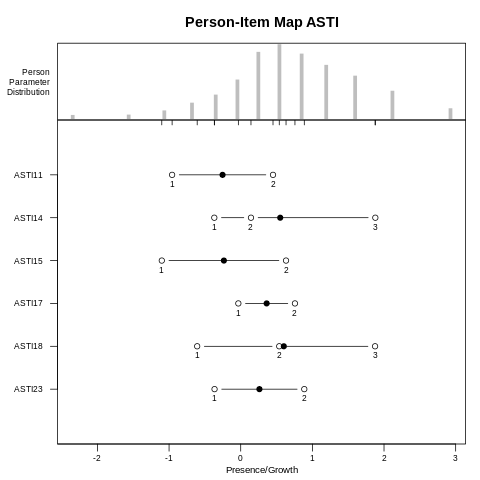

In [ ]:
%%R
plotPImap(fitpcm, latdim = "Presence/Growth", main = "Person-Item Map ASTI")

As opposed to the RSM, the distances between the category thresholds vary
across items. Note that sometimes it can happen that two threshold parameters
appear to be switched in the PI-map. In this case, a look at the corresponding ICC
plot helps. For instance, if the threshold 2 is lower than the threshold 1, this means
nowhere on the latent trait a category 2 has an endorsement probability higher than
the remaining categories. This isn't the case here but we can still look at the ICCs with the following command.  
Tipp: To display the ICC not only for one item (here ASTI18), but for all items, you can use `item.subset = "all"`.

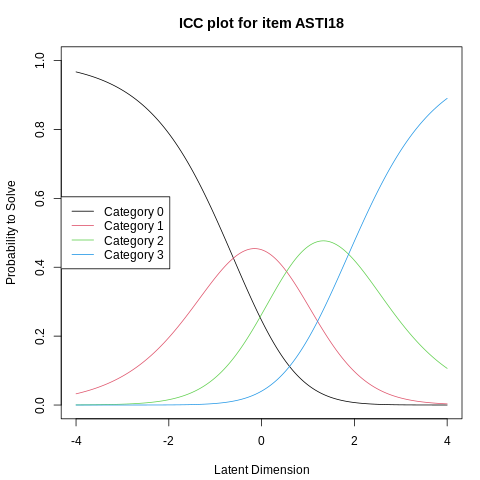

In [ ]:
%%R
plotICC(fitpcm, item.subset = 5)

### Test your understanding

- Examine the person-item map for the PCM. Do the item difficulties seem to cover the range of person abilities well? Are there any gaps?
- Choose one item and interpret its thresholds. What does it mean for a person to have a trait level above the first threshold but below the second?
- The PCM allows for different numbers of response categories per item. How might this flexibility be useful in designing a questionnaire?

# 5.3 Generalized Partial Credit Model

An extension of the PCM was proposed by Muraki (1992): the generalized
partial credit model (GPCM). Similar two a 2-PL model, it adds item discrimination parameters $α_i$ to the
model. The $α_i$ parameter, enables the ICCs to have varying slopes (in PCM the slopes (= discrimination power) are assumed to be the same)
Whereas the PCM belongs to the Rasch family, the GPCM does not. The
GPCM can be fitted using the ltm package via the gpcm function. This function
allows us to put restrictions on the discrimination parameters. For instance, setting `constraint="rasch"`,
we end up with a PCM. Thus, the PCM is nested within
a GPCM. We can use this property for constructing an LR-test.  

## The dataset

Let us illustrate this PCM/GPCM strategy using the ASTI data once more, but
this time using a different subscale: self-transcendence (ST) with seven polytomous
items.

## Load and inspect the dataset

In [ ]:
# Load the data in R
ro.r("data(ASTI)")

# Convert data to a Pandas df
ASTI = pandas2ri.rpy2py(ro.globalenv['ASTI'])

# Extract ST items
STitems = ASTI.iloc[:, [1,3,7,12,15,23,24]]

# Inspect the dataset
print(STitems.head())

# Put data back into R
ro.globalenv['STitems'] = STitems

   ASTI2  ASTI4  ASTI8  ASTI13  ASTI16  ASTI24  ASTI25
1    2.0    3.0    1.0     2.0     3.0     0.0     2.0
2    2.0    2.0    1.0     2.0     2.0     1.0     1.0
3    1.0    1.0    2.0     2.0     1.0     1.0     2.0
4    2.0    3.0    2.0     2.0     3.0     0.0     1.0
5    3.0    3.0    1.0     2.0     3.0     1.0     0.0


## Fit the model

In [ ]:
ro.r('stpcm <- gpcm(STitems, constraint = "rasch")') #PCM

ro.r('stgpcm <- gpcm(STitems)') #GPCM

print(ro.r('summary(stpcm)'))
print(ro.r('summary(stgpcm)'))

#ro.r('anova(stpcm, stgpcm)') #LR-test # CHECK


Call:
gpcm(data = STitems, constraint = "rasch")

Model Summary:
   log.Lik      AIC      BIC
 -9286.113 18610.23 18705.78

Coefficients:
$ASTI2
         value std.err z.value
Catgr.1 -1.452   0.114 -12.784
Catgr.2 -0.545   0.082  -6.639
Catgr.3  1.198   0.092  12.990
Dscrmn   1.000      NA      NA

$ASTI4
         value std.err z.value
Catgr.1 -1.824   0.125 -14.559
Catgr.2 -0.619   0.080  -7.688
Catgr.3  1.375   0.094  14.654
Dscrmn   1.000      NA      NA

$ASTI7
         value std.err z.value
Catgr.1 -1.070   0.097 -11.024
Catgr.2 -0.093   0.082  -1.136
Catgr.3  1.393   0.103  13.584
Dscrmn   1.000      NA      NA

$ASTI13
         value std.err z.value
Catgr.1 -1.276   0.096 -13.299
Catgr.2  0.010   0.076   0.135
Dscrmn   1.000      NA      NA

$ASTI16
         value std.err z.value
Catgr.1 -1.531   0.108 -14.127
Catgr.2 -0.217   0.080  -2.726
Catgr.3  1.358   0.099  13.762
Dscrmn   1.000      NA      NA

$ASTI24
        value std.err z.value
Catgr.1 -0.57   0.077  -7.409
Catgr.2

We see that the GPCM fits better than the PCM. AIC (PCM = 18610.23 GCPM = 18190.04) and BIC (PCM = 18705.78 GCPM = 18320.79) are clearly lower for the GPCM compared to the PCM.

## ICCs

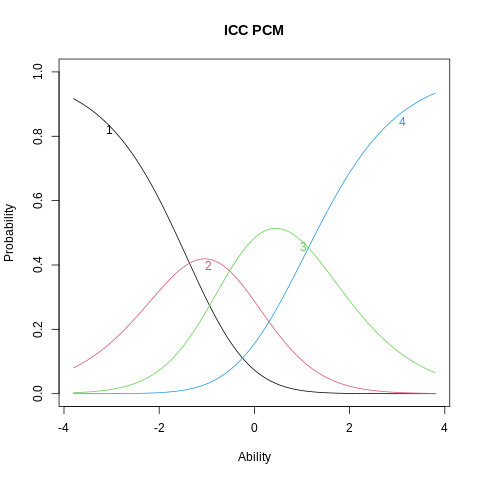

In [ ]:
%%R
plot(stpcm, main = "ICC PCM", items = 1)

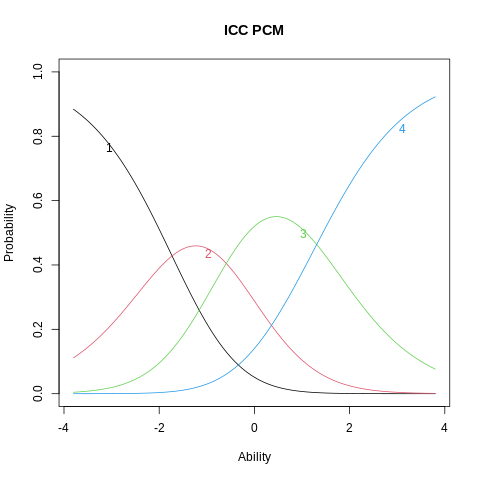

In [ ]:
%%R
plot(stpcm, main = "ICC PCM", items = 2)

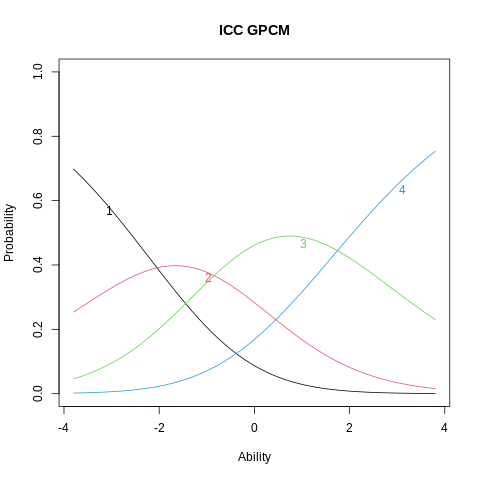

In [ ]:
%%R
plot(stgpcm, main = "ICC GPCM", items = 1)

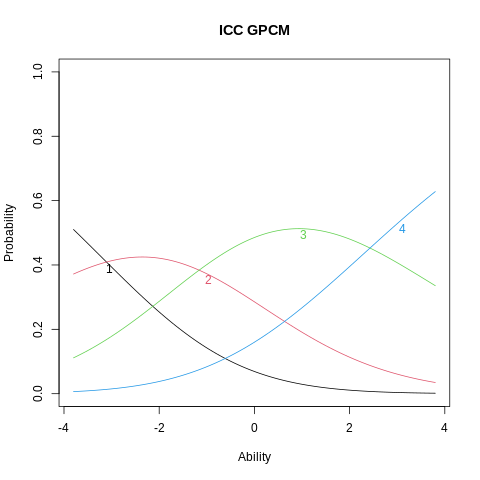

In [ ]:
%%R
plot(stgpcm, main = "ICC GPCM", items = 2)

The ICCs show the difference between the PCM and the GPCM. The first two panels present the ICCs for 2 items based on a PCM fit. We see that the ICC slopes within and across items are constant. The ICCs for these items look very similar, but they are not exactly the same. The lower panels contain the ICCs for 2 items from the GPCM fit. The slopes vary across items; within each item, they are the same. This variation is due to the $α_i$ added to the model.

## Interpretation
The item with the higher discrimination parameter will have a steeper ICC curve. This indicates that the item is better at differentiating between individuals with higher and lower levels of the latent trait. The item with the lower discrimination parameter will have a flatter ICC curve.
This means the item is less effective at distinguishing between individuals with different trait levels. The responses to this item are less strongly related to the overall trait being measured.

### Test your understanding

- Based on the  comparison of the PCM and GPCM, why might the GPCM be a better fit for the ST items?

- Examine the ICC plots for both models. How does the inclusion of discrimination parameters in the GPCM change the interpretation of item difficulty and discrimination?

- In what situations might you prefer to use a PCM even if the GPCM fits the data slightly better?